# Podstawy Sztucznej Inteligencji 2018/2019



Prosze uzupelnic kod tam gdzie znajduje napis `YOUR CODE HERE` lub 'YOUR ANSWER HERE'.

Warto zresetowac 'kernel' i sprawdzic czy caly notatnik uruchamiany od poczatku nie daje bledow.

---

## Regresja logistyczna (1d) metodą najmniejszego spadku

Rozważmy  klasyfikator liniowy w postaci:

$$ y = \sigma ( x\cdot w + b) $$

$x$ jest wektorem cech, w ogólnym przypadku mającym $n$ składowych.

Funkcja nieliniowa $\sigma(x) $ jest dana wzrorem:

$$\sigma(x) = \frac{1}{1+e^{-x}}. $$

Zauważ, że jej pochodna wynosi:

$$\sigma'(x) = \sigma(x) \left(1-\sigma(x)\right).$$


Zaimplementujemy algorytm najmniejszego spadku w przypadku **jednowymiarowym** dla regresji liniowej. Weżmy następujące dane:


In [14]:
import numpy as np 
import matplotlib.pyplot as plt


x = np.array([-2.29399323, -1.43363036, -0.52468804, -0.39544295, -0.24097318,
       -0.14898657, -0.0343155 ,  0.19022609,  0.38726758,  0.59190507,
        0.91906829,  1.03690893])

y= np.array([-7.77733551, -4.70740336, -2.41251556,  0.36564371, -1.9492586 ,
       -0.19388007,  0.82003484,  2.6322221 ,  2.26459065,  2.97531505,
        4.8613992 ,  7.20417432])
m = x.shape[0]
y[y>0] = 1
y[y<0] = 0

In [15]:
w, b = 1, 3

In [16]:
sigmoid = lambda x:1/(1+np.exp(-x))
sigmoid_p = lambda x:sigmoid(x)*(1-sigmoid(x))

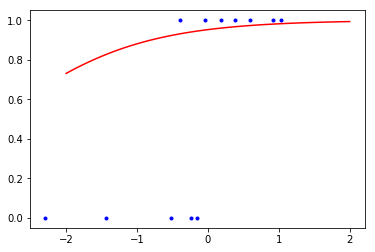

In [17]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,sigmoid(w*xlin+b),'r-')

### Zadanie 1 - Funkcja straty

Niech funkcją straty będzie suma kwadratów odchyleń przewidywania modelu od rzeczywistej wartości:

$$ L = \frac{1}{2m} \sum_{i=0}^{m-1} (\sigma(w x_i+b) - y_i)^2$$

Zaimplemenuj funkcję straty. 

*Uwaga* - zakładamy, że `x` I `y` są globalnymi zmiennymi zainicjowanymi w komórkach powyżej.


In [18]:
L = lambda w,b: (0.5 / m)*(np.sum((sigmoid(w*x+b) - y)**2))

In [19]:
np.testing.assert_approx_equal(L(1,3),0.15719671687181994)


### Zadanie 2 - zaimplementuj pochodne (gradienty)

Oblicz pochodne funkcji  strat po parametrach w i b

$$\frac{\partial L}{\partial w} = \frac{\partial  \frac{1}{2m} \sum_{i=0}^{m-1} (\sigma(w x_i+b) - y_i)^2}{\partial w}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (\sigma(w x_i+b) - y_i) \sigma'(w x_i+b) x_i
$$

$$\frac{\partial L}{\partial b} = \frac{\partial  \frac{1}{2} \sum_{i=0}^{m-1} (\sigma(w x_i+b) - y_i)^2}{\partial b}  = 
\frac{1}{m} \sum_{i=0}^{m-1} (\sigma(w x_i+b) - y_i)  \sigma'(w x_i+b)
$$

w punkcie $w = 1$, $b = 0.1$.

Oznaczenie `dw`  użyte w kodzie poniżej często się stosuje jako skrót $\frac{\partial L}{\partial w}$. Podobnie  jest z `db`.

In [20]:
dw = (1/m) *np.sum((sigmoid(w*x+b) - y) * sigmoid_p(w*x + b)*x)
db = (1/m) *np.sum((sigmoid(w*x+b) - y) * sigmoid_p(w*x + b))

In [21]:
np.testing.assert_approx_equal(-0.04698730835958943, dw,significant=6)
np.testing.assert_approx_equal(0.03527485740880648 ,db,significant=6)

### Zadanie 3

Oblicz pochodne korzystając ze wzoru na iloraz różnicowy:

$$\frac{df}{dx} \simeq \frac{f(x+h)-f(x)}{h}$$ 

Przyjmij $h=0.001$ (ważne aby wyszły testy).

Czy otrzymane wartości są zbliżone do anliczonych analitycznie? 

In [22]:
h = 0.001
dw_num = (L(w+h, b) - L(w, b)) / h
db_num = (L(w, b + h) - L(w, b)) / h


In [23]:
np.testing.assert_approx_equal(-0.04699303, dw_num,significant=6)
np.testing.assert_approx_equal(0.03526763 , db_num,significant=6)

### Zadanie 4

Zaimplementuj algorytm najmniejszego spadku. W tym celu startując z $w=1$ i $b=0.1$, wykonaj:

1. Oblicz gradienty (pochodne) w punktcie $w,b$ korzystając z implementacji `dw` i `db`.
1. $w \to w - \alpha \frac{\partial L}{\partial w}$
2. $b \to b - \alpha \frac{\partial L}{\partial b}$


Wykonaj 100 takich  kroków z $\alpha=1.0$. Na wykresie zobaczysz efekt takiego działania.




In [24]:
alpha = 1.0
w, b = 1., 3.
for i in range(100):
    dw = (1/m) *np.sum((sigmoid(w*x+b) - y) * sigmoid_p(w*x + b)*x)
    db = (1/m) *np.sum((sigmoid(w*x+b) - y) * sigmoid_p(w*x + b))
#     print('DW, DB', dw, db, 'w, b', w, b)
    w =  w - alpha * dw
    b =  b - alpha * db
    
    
print(L(w,b),w,b,dw,db)

0.0530597750516114 2.601577640629592 0.7189224697674882 -0.00508914746800071 0.005317729281229068


In [25]:
np.testing.assert_approx_equal( w,2.601,  significant=3)
np.testing.assert_approx_equal( b, 0.7189, significant=3)

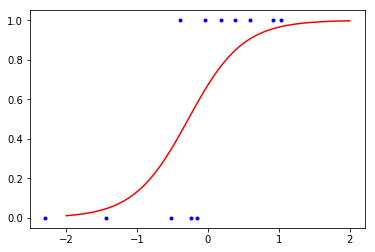

In [26]:
plt.plot(x,y,'b.')
xlin = np.linspace(-2,2,55)
plt.plot(xlin,sigmoid(w*xlin+b),'r-')